# Differential Equations

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import logging
logging.getLogger('matplotlib.font_manager').disabled = True
import IPython.display as ipd
from matplotlib import gridspec
import ipywidgets as widgets  # interactive display
%config InlineBackend.figure_format = 'retina'
# use NMA plot style
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/content-creation/main/nma.mplstyle")
my_layout = widgets.Layout()

In [3]:
# @title Plotting Functions

def plot_dPdt(alpha=.3):
  """ Plots change in population over time
    Args:
      alpha: Birth Rate
    Returns:
      A figure two panel figure
      left panel: change in population as a function of population
      right panel: membrane potential as a function of time
  """

  with plt.xkcd():
    time=np.arange(0, 10 ,0.01)
    fig = plt.figure(figsize=(12,4))
    gs = gridspec.GridSpec(1, 2)

    ## dpdt as a fucntion of p
    plt.subplot(gs[0])
    plt.plot(np.exp(alpha*time), alpha*np.exp(alpha*time))
    plt.xlabel(r'Population $p(t)$ (millions)')
    plt.ylabel(r'$\frac{d}{dt}p(t)=\alpha p(t)$')

    ## p exact solution
    plt.subplot(gs[1])
    plt.plot(time, np.exp(alpha*time))
    plt.ylabel(r'Population $p(t)$ (millions)')
    plt.xlabel('time (years)')
    plt.show()


def plot_V_no_input(V_reset=-75):
  """
    Args:
      V_reset: Reset Potential
    Returns:
      A figure two panel figure
      left panel: change in membrane potential as a function of membrane potential
      right panel: membrane potential as a function of time
  """
  E_L=-75
  tau_m=10
  t=np.arange(0,100,0.01)
  V= E_L+(V_reset-E_L)*np.exp(-(t)/tau_m)
  V_range=np.arange(-90,0,1)
  dVdt=-(V_range-E_L)/tau_m

  with plt.xkcd():
    time=np.arange(0, 10, 0.01)
    fig = plt.figure(figsize=(12, 4))
    gs = gridspec.GridSpec(1, 2)

    plt.subplot(gs[0])
    plt.plot(V_range,dVdt)
    plt.hlines(0,min(V_range),max(V_range), colors='black', linestyles='dashed')
    plt.vlines(-75, min(dVdt), max(dVdt), colors='black', linestyles='dashed')
    plt.plot(V_reset,-(V_reset - E_L)/tau_m, 'o', label=r'$V_{reset}$')
    plt.text(-50, 1, 'Positive')
    plt.text(-50, -2, 'Negative')
    plt.text(E_L - 1, max(dVdt), r'$E_L$')
    plt.legend()
    plt.xlabel('Membrane Potential V (mV)')
    plt.ylabel(r'$\frac{dV}{dt}=\frac{-(V(t)-E_L)}{\tau_m}$')

    plt.subplot(gs[1])
    plt.plot(t,V)
    plt.plot(t[0],V_reset,'o')
    plt.ylabel(r'Membrane Potential $V(t)$ (mV)')
    plt.xlabel('time (ms)')
    plt.ylim([-95, -60])

    plt.show()


## LIF PLOT
def plot_IF(t, V,I,Spike_time):
  """
    Args:
      t  : time
      V  : membrane Voltage
      I  : Input
      Spike_time : Spike_times
    Returns:
      figure with three panels
      top panel: Input as a function of time
      middle panel: membrane potential as a function of time
      bottom panel: Raster plot
  """

  with plt.xkcd():
    fig = plt.figure(figsize=(12, 4))
    gs = gridspec.GridSpec(3, 1,  height_ratios=[1, 4, 1])

    # PLOT OF INPUT
    plt.subplot(gs[0])
    plt.ylabel(r'$I_e(nA)$')
    plt.yticks(rotation=45)
    plt.hlines(I,min(t),max(t),'g')
    plt.ylim((2, 4))
    plt.xlim((-50, 1000))

    # PLOT OF ACTIVITY
    plt.subplot(gs[1])
    plt.plot(t,V)
    plt.xlim((-50, 1000))
    plt.ylabel(r'$V(t)$(mV)')

    # PLOT OF SPIKES
    plt.subplot(gs[2])
    plt.ylabel(r'Spike')
    plt.yticks([])
    plt.scatter(Spike_time, 1 * np.ones(len(Spike_time)), color="grey", marker=".")
    plt.xlim((-50, 1000))
    plt.xlabel('time(ms)')
    plt.show()


## Plotting the differential Equation
def plot_dVdt(I=0):
  """
    Args:
      I  : Input Current
    Returns:
      figure of change in membrane potential as a function of membrane potential
  """

  with plt.xkcd():
    E_L = -75
    tau_m = 10
    V = np.arange(-85, 0, 1)
    g_L = 10.
    fig = plt.figure(figsize=(6, 4))

    plt.plot(V,(-(V-E_L) + I*10) / tau_m)
    plt.hlines(0, min(V), max(V), colors='black', linestyles='dashed')
    plt.xlabel('V (mV)')
    plt.ylabel(r'$\frac{dV}{dt}$')
    plt.show()

In [4]:
# @title Helper Functions

## EXACT SOLUTION OF LIF
def Exact_Integrate_and_Fire(I,t):
  """
    Args:
      I  : Input Current
      t : time
    Returns:
      Spike : Spike Count
      Spike_time : Spike time
      V_exact : Exact membrane potential
  """

  Spike = 0
  tau_m = 10
  R = 10
  t_isi = 0
  V_reset = E_L = -75
  V_exact = V_reset * np.ones(len(t))
  V_th = -50
  Spike_time = []

  for i in range(0, len(t)):

    V_exact[i] = E_L + R*I + (V_reset - E_L - R*I) * np.exp(-(t[i]-t_isi)/tau_m)

    # Threshold Reset
    if V_exact[i] > V_th:
        V_exact[i-1] = 0
        V_exact[i] = V_reset
        t_isi = t[i]
        Spike = Spike+1
        Spike_time = np.append(Spike_time, t[i])

  return Spike, Spike_time, V_exact

## Population Equation

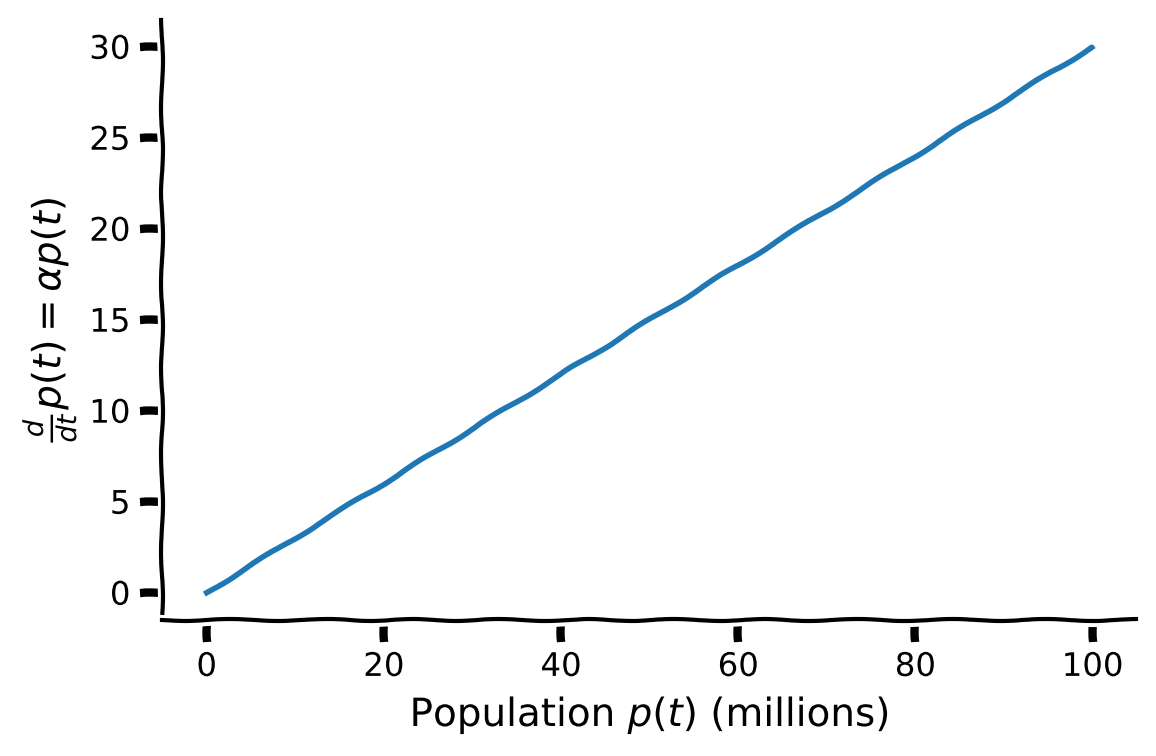

In [5]:
p = np.arange(0, 100, 0.1)

with plt.xkcd():

  dpdt = 0.3*p
  fig = plt.figure(figsize=(6, 4))
  plt.plot(p, dpdt)
  plt.xlabel(r'Population $p(t)$ (millions)')
  plt.ylabel(r'$\frac{d}{dt}p(t)=\alpha p(t)$')
  plt.show()

In [6]:
my_layout.width = '450px'
@widgets.interact(
    alpha=widgets.FloatSlider(.3, min=-1., max=1., step=.1, layout=my_layout)
)
def Pop_widget(alpha):
  plot_dPdt(alpha=alpha)
  plt.show()

interactive(children=(FloatSlider(value=0.3, description='alpha', layout=Layout(width='450px'), max=1.0, min=-…

In [ ]:
my_layout.width = '450px'
@widgets.interact(
  V_reset=widgets.FloatSlider(-77., min=-91., max=-61., step=2,
                              layout=my_layout)
)

def V_reset_widget(V_reset):
  plot_V_no_input(V_reset)

interactive(children=(FloatSlider(value=-77.0, description='V_reset', layout=Layout(width='450px'), max=-61.0,…

In [ ]:
my_layout.width = '100px'
@widgets.interact(
  I=widgets.FloatSlider(3., min=0., max=20., step=2,
                                layout=my_layout)
)

def Pop_widget(I):
  plot_dVdt(I=I)
  plt.show()

interactive(children=(FloatSlider(value=3.0, description='I', layout=Layout(width='100px'), max=20.0, step=2.0…

TraitError: The 'value' trait of a FloatSlider instance expected a float, not the NoneType None.

TraitError: The 'value' trait of a FloatSlider instance expected a float, not the NoneType None.

In [11]:
# @markdown Make sure you execute this cell to be able to hear the neuron
I = 3
t = np.arange(0, 1000, dt)
Spike, Spike_time, V = Exact_Integrate_and_Fire(I, t)

plot_IF(t, V, I, Spike_time)
ipd.Audio(V, rate=len(V))

NameError: name 'dt' is not defined